# Ex1_Erros - Ismael Marinho

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Exercício 1.1 

### O método “divisão e média”, um método antigo para estimação de raiz quadrada de um número positivo a, pode ser formulado como: Xi = (Xi + a/Xi)/2.  
### Calcule o erro relativo da aproximação para as 10 primeiras iterações

In [2]:
a = 2

value = np.float64(np.sqrt(a))
value_aprox = np.float64(1)

for i in range(10):
    value_aprox = (value_aprox + a/value_aprox)/2
    
    
print(abs(value - value_aprox)/value * 100)

1.5700924586837748e-14


###  Exercício 

### 1.2 Para computadores, o épsilon da máquina, ε, pode ser definido como o menor número que, adicionado a um, retorna um número maior que um, como definimos anteriormente. Usando o algoritmo abaixo, implemente um programa que calcula o épsilon da sua máquina. Compare com os resultados obtidos via numpy.

In [3]:
e = np.float64(1)

while(not(e + 1 <= 1)):
    e = e/2
e *= 2

print(e)
print(np.finfo(dtype=np.float64).eps)

2.220446049250313e-16
2.220446049250313e-16


### Exercício 1.3 

### Observe que x^(1) = 1/3, x^(2) = 4*1/3 - 1, x^(3) = 4*1/3 - 1, e por aí vai, ou seja, temos uma sequência constante igual a 1/3. Implemente essa série iterativa, verificando se a convergência de fato ocorre e justifique o resultado obtido

In [4]:
x = 1/3

for i in range(5):
    x = 4*x -1
    print(x)

0.33333333333333326
0.33333333333333304
0.33333333333333215
0.3333333333333286
0.3333333333333144


Sim ela converge, porque 4 * 1/3 - 1 resulta em 1/3, e na proxima iteração como o resultado da ultima permaneceu "o mesmo", vai ficar retornando 1/3 para sempre. Porém gera algumas diferenças por ser calculado no computador.

### Exercício 1.4 

### Considere as expressões: exp(1/u) / 1 + exp(1/u) e 1 / exp(-1/u) + 1 com µ > 0. Verifique que elas são idênticas como funções reais. Teste no computador cada uma delas para µ = 0, 1, µ = 0, 01, µ = 0, 001 ou menor e responda: Qual dessas expressões é mais adequada quando µ é um número pequeno? Por quê?

In [5]:
u = 0.1

print(np.exp(1/u) / (1 + np.exp(1/u)))
print(1 / (np.exp(-1/u) + 1))

0.9999546021312976
0.9999546021312976


A de baixo é mais adequeada pois evita o cancelamento catastrófico.

### Exercício 1.5 Observe a seguinte identidade: f(x) = ((1 + x) - 1)x

### Não é muito difícil verificar, analiticamente, que, para qualquer valor de x, sempre teremos f(x) = 1. Faça um programa que calcule o valor da expressão para x = 10^(−12) , x = 10^(−15) e x = 10^(−17). Compare os resultados com o resultado analítico e explique-os.

In [6]:
print(((1 + 10**(-8)) - 1) / 10**(-8))

print(((1 + 10**(-12)) - 1) / 10**(-12))
print(((1 + 10**(-15)) - 1) / 10**(-15))
print(((1 + 10**(-17)) - 1) / 10**(-17))

0.999999993922529
1.000088900582341
1.1102230246251565
0.0


Quando menor for o número mais erro irá ocasionar por causa do arredondamento. Inclusive com 10^-17, o valor é tão pequeno que quando soma e retira 1, fica igual a 0, e zero dividido por 10^-17 é 0.

In [7]:
(1 + 10**(-17)) - 1

0.0

### Exercício 1.6

### Existem diferentes métodos para calcular aproximadamente o valor de π computacionalmente. Vários desses métodos usam a aproximação por séries de Taylor para o arcotangente, definida por: arctan(x) = x - x^3/3 + x^5/5 - x^7/7 + ...

In [8]:
def serie_taylor(x, amostragem):
    value = 0;

    for i in range(amostragem):
        value += pow(x, 2*i+1)/(2*i+1) * pow(-1, i);

    return value;


a) Fórmula de Machin

<function matplotlib.pyplot.show(close=None, block=None)>

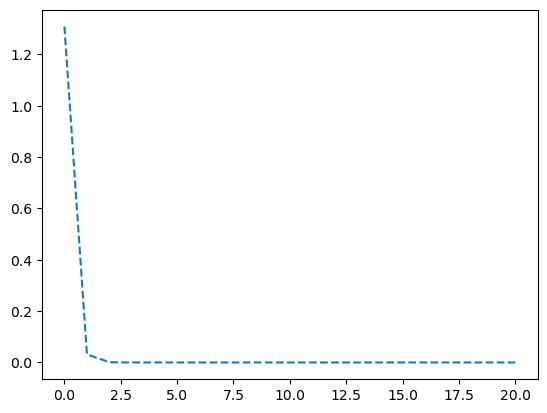

In [9]:
amostragem = np.arange(1, 22, 1)
erros_m = list()

for i in amostragem:
    machin = (4*(4*serie_taylor(0.2, i) - serie_taylor(1/239.0, i)))
    erros_m.append(abs(machin - np.pi)/machin * 100)
    
plt.plot(erros_m, linestyle = 'dashed')
plt.show

b) Fórmula de Hutton

<function matplotlib.pyplot.show(close=None, block=None)>

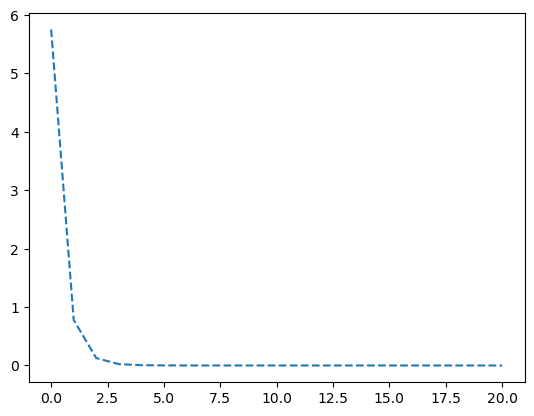

In [10]:
amostragem = np.arange(1, 22, 1)
erros_h = list()

for i in amostragem:
    hutton = 4*(serie_taylor(0.5, i) + serie_taylor(1/3, i))
    erros_h.append(abs(hutton - np.pi)/hutton * 100)
    
plt.plot(erros_h, linestyle = 'dashed')
plt.show

c) Fórmula de Clausen

<function matplotlib.pyplot.show(close=None, block=None)>

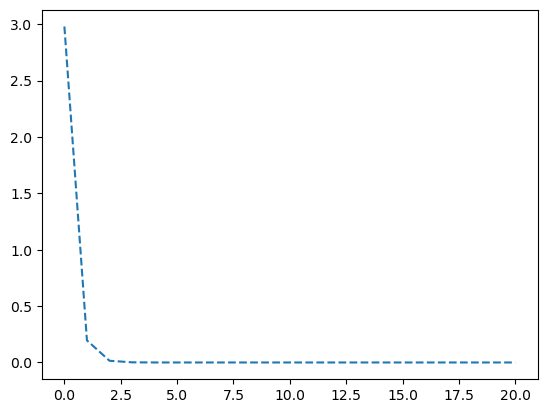

In [11]:
amostragem = np.arange(1, 22, 1)
erros_c = list()

for i in amostragem:
    clausen = 4*(2*serie_taylor(1/3, i) + serie_taylor(1/7, i))
    erros_c.append(abs(clausen - np.pi)/clausen * 100)

plt.plot(erros_c, linestyle = 'dashed')
plt.show

d) Fórmula de Dase

<function matplotlib.pyplot.show(close=None, block=None)>

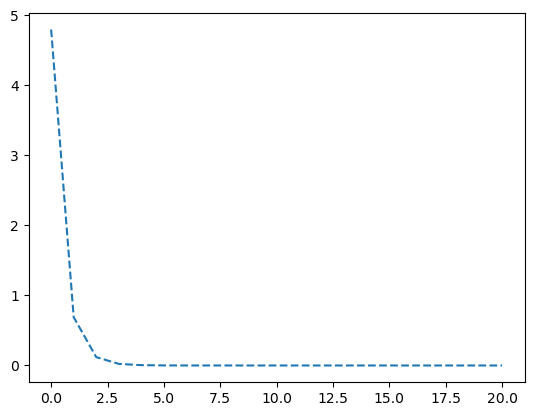

In [12]:
amostragem = np.arange(1, 22, 1)
erros_d = list()

for i in amostragem:
    dase = 4*(serie_taylor(0.5, i) + serie_taylor(1/5, i) + serie_taylor(1/8, i))
    erros_d.append(abs(dase - np.pi)/dase * 100)

plt.plot(erros_d, linestyle = 'dashed')
plt.show

Quanto maior o número de amostragem, menor vai ficando o erro relativo, chegando a ficar muito próximo do zero. Alguns algoritmos com menas amostragem conseguem valores melhores que os outros como o de "Machin", que atingiu um valor muito baixo em apenas 3 amostras.(valor = 0.0009) 